<a href="https://colab.research.google.com/github/cbobrasil/bike-rental-study/blob/main/citibike_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 3.9 MB/s eta 0:00:00


False

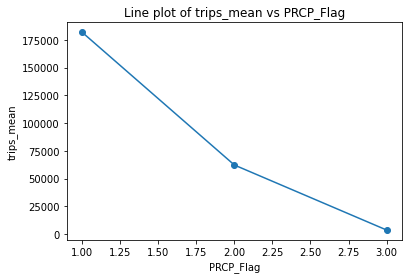

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import webbrowser



data_201601 = pd.read_csv(r'/content/data/JC-201601-citibike-tripdata.csv')
data_201602 = pd.read_csv(r'/content/data/JC-201602-citibike-tripdata.csv')
data_201603 = pd.read_csv(r'/content/data/JC-201603-citibike-tripdata.csv')
data_201604 = pd.read_csv(r'/content/data/JC-201604-citibike-tripdata.csv')
data_201605 = pd.read_csv(r'/content/data/JC-201605-citibike-tripdata.csv')
data_201606 = pd.read_csv(r'/content/data/JC-201606-citibike-tripdata.csv')
data_201607 = pd.read_csv(r'/content/data/JC-201607-citibike-tripdata.csv')
data_201608 = pd.read_csv(r'/content/data/JC-201608-citibike-tripdata.csv')
data_201609 = pd.read_csv(r'/content/data/JC-201609-citibike-tripdata.csv')
data_201610 = pd.read_csv(r'/content/data/JC-201610-citibike-tripdata.csv')
data_201611 = pd.read_csv(r'/content/data/JC-201611-citibike-tripdata.csv')
data_201612 = pd.read_csv(r'/content/data/JC-201612-citibike-tripdata.csv')

data_2016 = pd.concat([data_201601,data_201602,data_201603,data_201604,data_201605,data_201606,data_201607,data_201608,data_201609,data_201610,data_201611,data_201612])
data_2016['Start Time'] = pd.to_datetime(data_2016['Start Time'])
data_2016['Stop Time'] = pd.to_datetime(data_2016['Stop Time'])
data_2016['DATE'] = data_2016['Start Time'].dt.date
data_2016['Age'] = 2023 -  data_2016['Birth Year']

grouped_data_2016 = data_2016.groupby(['DATE']).agg({
    'Trip Duration': ['sum', 'count']
})

grouped_data_2016 = grouped_data_2016.rename(columns={
    'Trip Duration_sum': 'TD_sum',
    'Trip Duration_count': 'TD_count'
})
grouped_data_2016.columns = ['TD_sum', 'TD_count']
grouped_data_2016['DATE_'] = pd.to_datetime(grouped_data_2016.index)

#WEATHER TABLE

data_newark_2016 = pd.read_csv(r'/content/data/newark_airport_2016.csv')
data_newark_2016['TVAG_C'] = (data_newark_2016['TAVG'] - 32) * 5/9
data_newark_2016['TMAX_C'] = (data_newark_2016['TMAX'] - 32) * 5/9
data_newark_2016['TMIN_C'] = (data_newark_2016['TMIN'] - 32) * 5/9
data_newark_2016['DATE_'] = pd.to_datetime(data_newark_2016['DATE'])  

conditions = [data_newark_2016['PRCP'] <= 0,data_newark_2016['PRCP'] <= 1 , data_newark_2016['PRCP'] > 1]
values = [1,2,3]

data_newark_2016['PRCP_Flag'] = np.where(conditions[0], values[0], np.where(conditions[1], values[1],values[2]))

merged_table = pd.merge(data_newark_2016,grouped_data_2016, on='DATE_', how='left')

grouped_merged_table = merged_table.groupby(['PRCP_Flag']).agg({
    'TD_count': ['sum', 'mean']})


grouped_merged_table = grouped_merged_table.rename(columns={
    'TD_count_sum': 'trips_sum',
    'TD_count_mean': 'trips_mean'
})
grouped_merged_table.columns = ['trips_sum', 'trips_mean']

grouped_merged_table = grouped_merged_table.reset_index()

# Plot the data
plt.plot(grouped_merged_table['PRCP_Flag'], grouped_merged_table['trips_sum'], marker='o')

# Add axis labels and title
plt.xlabel('PRCP_Flag')
plt.ylabel('trips_mean')
plt.title('Line plot of trips_mean vs PRCP_Flag')

# Show the plot
# plt.show()

html = mpld3.fig_to_html(plt.gcf())
with open('plot.html', 'w') as f:
    f.write(html)

webbrowser.open('plot.html')
